In [2]:
start_x = 200
end_x = 1000
T = 60 # seconds

60

In [51]:
using JuMP,Gurobi

m = Model(solver=GurobiSolver(OutputFlag = 0))

#T = 50                # length of time horizon
@variable(m, x[1:T])    # resulting position
@variable(m, v[1:T])    # resulting velocity
@variable(m, z[1:T], Bin)
@variable(m, u[1:T-1])  # thruster input
@variable(m, w[1:T-1])
@constraint(m, x[1] == start_x)
@constraint(m, v[1] == 0)
#@constraint(m, v[2:20] .>= 22.352)
@constraint(m, x[T] == end_x)
#@constraint(m, v[2] >= 1)
@constraint(m, v[10:T] .>= 22.352*z[10:T])
for i in 2:10
    @constraint(m, v[i] >= 5)
    @constraint(m,v[i] >= v[i-1])
end
@constraint(m, v .<= 26.822*z)
@constraint(m, total_dist, sum(x[i] - x[i-1] for i in 2:T) == end_x - start_x)
@constraint(m, v[T] == 0)
@constraint(m, w .>= u)
@constraint(m, -w .<= u)
# satisfy the dynamics
for i = 1:T-1
    @constraint(m, x[i+1] == x[i] + v[i])
    @constraint(m, v[i+1] == v[i] + u[i])
end

# minimize 2-norm
@objective(m, Min, sum(u[1:10].^2) + sum(w[11:T-1]))

solve(m)
uopt = getvalue(u);


In [52]:
vopt = getvalue(v)
print(vopt)

[-0.0,5.0,7.24835,9.47403,11.677,13.8574,16.015,18.15,20.2623,22.352,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,22.5321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0]

In [53]:
print(getvalue(x))

[200.0,200.0,205.0,212.248,221.722,233.399,247.257,263.272,281.422,301.684,324.036,346.568,369.1,391.633,414.165,436.697,459.229,481.761,504.293,526.825,549.357,571.89,594.422,616.954,639.486,662.018,684.55,707.082,729.614,752.147,774.679,797.211,819.743,842.275,864.807,887.339,909.871,932.404,954.936,977.468,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0]

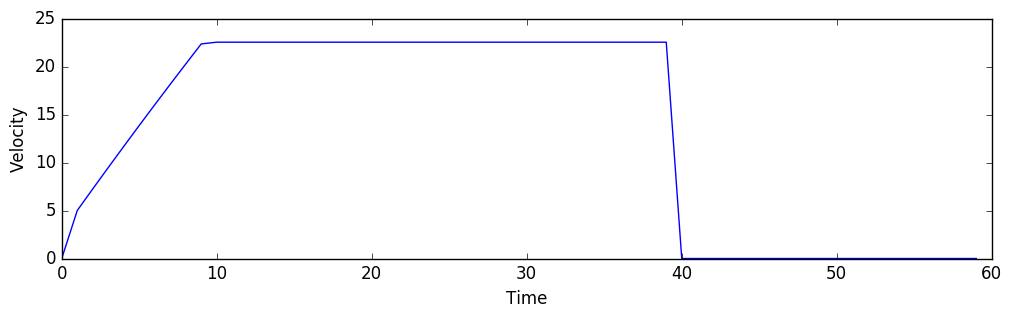

In [54]:
using PyPlot
figure(figsize=(12,3))
plot( 0:T-1, vopt);
xlabel("Time"); ylabel("Velocity");